In [12]:
from models.Tricomplex_model import Tricomplex_model
from tools.ODE_simulation import ODE_Simulation
from tools.KRAS_variant import *
import matplotlib.pyplot as plt #type: ignore

In [13]:
state_parameters = {'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10)}
sim = ODE_Simulation(Tricomplex_model, WT, G12C, state_parameters)

In [17]:
Total_RAS = 4e-7 #TODO: integrate this into a functin get_y0 so that fract_mut and other ivs can be a state param.
fract_mut = 0.25
WT_iv = Total_RAS*(1-fract_mut)
Mut_iv = Total_RAS*(fract_mut)

y0 = [WT_iv, 0, 0, 4e-7, 0, Mut_iv, 0, 0, 0, 1e-6, 1e-4, 0, 0, 0]

In [18]:
n_doses = 50
drug_doses = np.logspace(-2, 3, n_doses)*1e-6
responses = []

for drug_dose in drug_doses:
    y0_temp = y0
    y0_temp[9] = drug_dose
    result = sim.integrate_model_to_ss(y0_temp)
    responses.append(result)

Text(0, 0.5, 'Effector bound to RAS-GTP [%]')

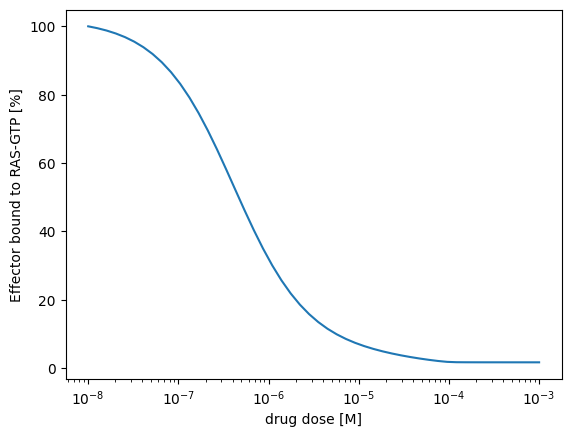

In [19]:
per_effs = [result["per_RAS_GTP_Eff"] for result in responses]

plt.semilogx(drug_doses, per_effs/per_effs[0]*100)
plt.xlabel("drug dose [M]")
plt.ylabel("Effector bound to RAS-GTP [%]")